In [1]:
#import Required Modules
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

In [2]:
#Load the Dataset into the training_df Dataframe
training_df = pd.read_csv(filepath_or_buffer = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")


In [3]:
#This is How the DataFrame Looks like
training_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [4]:
training_df["median_house_value"] /= 1000.0 #scaling will keep the loss values and learning rates in friendlier range

training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [5]:
#Looking for anamolies using Describe.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [6]:
def build_model(my_learning_rate):
    #This Function is Used to Build a Model with a Learning rate
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(units = 1, input_shape = (1,)))
    
    model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                   loss = "mean_squared_error",
                    metrics = [tf.keras.metrics.RootMeanSquaredError()])
    return model
    

In [7]:
#This function is used to train the model from the function build_model 
def train_model(model, df, feature, label, epochs, batch_size):
 
  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")
                        
    

Defined the create_model and traing_model functions.


In [8]:
#This is a function to scatter plot the trained weights and biases using matplotlib
def plot_the_model(trained_weight, trained_bias, feature, label):

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

In [9]:
#This function is used to plot the loss on a graph using matplotlib 
def plot_the_loss_curve(epochs,rmse):
    
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97,rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve Functions")

Defined the plot_the_model and plot_the_loss_curve Functions


Train on 17000 samples
Epoch 1/30
17000/17000 [==============================] - 1s 49us/sample - loss: 230941.1943 - root_mean_squared_error: 480.5632s - loss: 393899.3321 - root_mean_squared
Epoch 2/30
17000/17000 [==============================] - 1s 47us/sample - loss: 27667.1538 - root_mean_squared_error: 166.3345
Epoch 3/30
17000/17000 [==============================] - 1s 49us/sample - loss: 27032.0847 - root_mean_squared_error: 164.4144
Epoch 4/30
17000/17000 [==============================] - 1s 49us/sample - loss: 26373.5011 - root_mean_squared_error: 162.39920s - loss: 27509.0370 - root_mean_squared_
Epoch 5/30
17000/17000 [==============================] - 1s 49us/sample - loss: 25570.4907 - root_mean_squared_error: 159.9078
Epoch 6/30
17000/17000 [==============================] - 1s 78us/sample - loss: 24983.7740 - root_mean_squared_error: 158.0626
Epoch 7/30
17000/17000 [==============================] - 1s 71us/sample - loss: 24297.6937 - root_mean_squared_error: 155.87

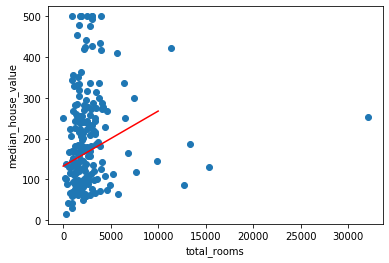

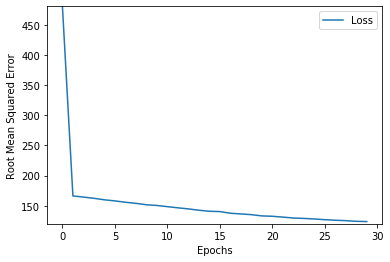

In [10]:
#Hyperparameters to understand and plot the behaviour of model and it's loss
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [11]:
#this function is ued to predict the house value in California
def predict_house_values(n,feature, label):
    #batch to predict
    batch = training_df[feature][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)
    #Understand the batches used from 10000 to 100000+n
    print("These are the Batches:")
    print("------------------------------------")
    print(batch )
    print("-------------------------------------")
    print("feature  label   predicted")
    print("value    value   value")
    print("         in thousand$ in thousand$")
    print("_______________________________________")
    for i in range(n):
        print("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                      training_df[label][10000 + i],
                                     predicted_values[i][0]))

In [12]:
predict_house_values(10, my_feature, my_label)

These are the Batches:
------------------------------------
10000    1960.0
10001    3400.0
10002    3677.0
10003    2202.0
10004    2403.0
10005    5652.0
10006    3318.0
10007    2552.0
10008    1364.0
10009    3468.0
Name: total_rooms, dtype: float64
-------------------------------------
feature  label   predicted
value    value   value
         in thousand$ in thousand$
_______________________________________
 1960     53             159
 3400     92             178
 3677     69             182
 2202     62             162
 2403     80             165
 5652    295             209
 3318    500             177
 2552    342             167
 1364    118             151
 3468    128             179


Train on 17000 samples
Epoch 1/30
17000/17000 [==============================] - 0s 9us/sample - loss: 3982487.7480 - root_mean_squared_error: 1995.6171
Epoch 2/30
17000/17000 [==============================] - 0s 9us/sample - loss: 3117983.0081 - root_mean_squared_error: 1765.7812
Epoch 3/30
17000/17000 [==============================] - 0s 11us/sample - loss: 3017405.4987 - root_mean_squared_error: 1737.0681
Epoch 4/30
17000/17000 [==============================] - 0s 15us/sample - loss: 3182038.6945 - root_mean_squared_error: 1783.8270
Epoch 5/30
17000/17000 [==============================] - 0s 15us/sample - loss: 3049042.1181 - root_mean_squared_error: 1746.1506
Epoch 6/30
17000/17000 [==============================] - 0s 15us/sample - loss: 3142711.2127 - root_mean_squared_error: 1772.7695
Epoch 7/30
17000/17000 [==============================] - 0s 15us/sample - loss: 2971050.8409 - root_mean_squared_error: 1723.6736
Epoch 8/30
17000/17000 [==============================] - 0s 1

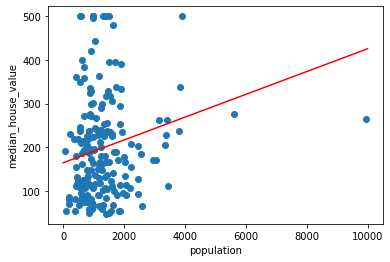

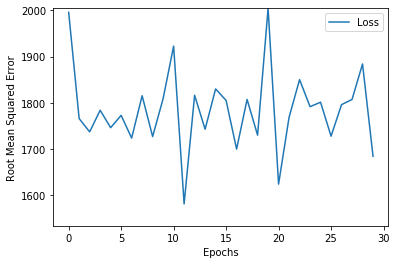

These are the Batches:
------------------------------------
10000    1286.0
10001    1867.0
10002    2191.0
10003    1052.0
10004    1647.0
10005    2312.0
10006    1604.0
10007    1066.0
10008     338.0
10009    1604.0
10010    1200.0
10011     292.0
10012    2014.0
10013    1817.0
10014    1328.0
Name: population, dtype: float64
-------------------------------------
feature  label   predicted
value    value   value
         in thousand$ in thousand$
_______________________________________
 1286     53             198
 1867     92             213
 2191     69             222
 1052     62             192
 1647     80             208
 2312    295             225
 1604    500             207
 1066    342             193
  338    118             174
 1604    128             207
 1200    187             196
  292     80             172
 2014    112             217
 1817     95             212
 1328     69             199


In [14]:
#Hyperparameneter using different feature population
my_feature = 'population'


learning_rate = 2
epochs = 30
batch_size = 120

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label,
                                        epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Train on 17000 samples
Epoch 1/15
17000/17000 [==============================] - 10s 566us/sample - loss: 42569.2398 - root_mean_squared_error: 206.3230
Epoch 2/15
17000/17000 [==============================] - 13s 738us/sample - loss: 29249.8400 - root_mean_squared_error: 171.0257
Epoch 3/15
17000/17000 [==============================] - 10s 591us/sample - loss: 28429.3908 - root_mean_squared_error: 168.6100
Epoch 4/15
17000/17000 [==============================] - 9s 536us/sample - loss: 27337.5218 - root_mean_squared_error: 165.3407
Epoch 5/15
17000/17000 [==============================] - 12s 708us/sample - loss: 26230.6759 - root_mean_squared_error: 161.9588
Epoch 6/15
17000/17000 [==============================] - 11s 666us/sample - loss: 25869.5968 - root_mean_squared_error: 160.8403
Epoch 7/15
17000/17000 [==============================] - 11s 671us/sample - loss: 25978.3223 - root_mean_squared_error: 161.1778
Epoch 8/15
17000/17000 [==============================] - 11s 675us/

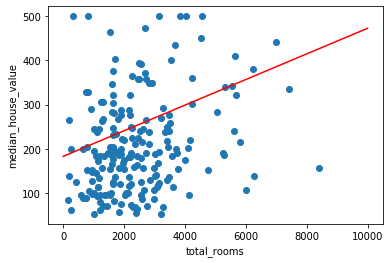

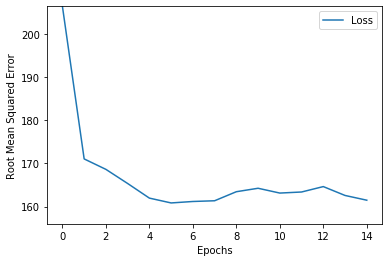

These are the Batches:
------------------------------------
10000    1960.0
10001    3400.0
10002    3677.0
10003    2202.0
10004    2403.0
10005    5652.0
10006    3318.0
10007    2552.0
10008    1364.0
10009    3468.0
Name: total_rooms, dtype: float64
-------------------------------------
feature  label   predicted
value    value   value
         in thousand$ in thousand$
_______________________________________
 1960     53             240
 3400     92             282
 3677     69             290
 2202     62             247
 2403     80             253
 5652    295             347
 3318    500             279
 2552    342             257
 1364    118             222
 3468    128             283


In [15]:
#Hyperparameneter using different feature total_room
my_feature = "total_rooms"

learning_rate = 0.05
epochs = 15
batch_size = 3

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
predict_house_values(10, my_feature, my_label)

Train on 17000 samples
Epoch 1/15
17000/17000 [==============================] - 8s 497us/sample - loss: 14243.8008 - root_mean_squared_error: 119.3474
Epoch 2/15
17000/17000 [==============================] - 8s 480us/sample - loss: 13472.8026 - root_mean_squared_error: 116.0724
Epoch 3/15
17000/17000 [==============================] - 7s 410us/sample - loss: 13483.5593 - root_mean_squared_error: 116.1187
Epoch 4/15
17000/17000 [==============================] - 9s 516us/sample - loss: 13482.3096 - root_mean_squared_error: 116.1133
Epoch 5/15
17000/17000 [==============================] - 9s 505us/sample - loss: 13474.6063 - root_mean_squared_error: 116.0801
Epoch 6/15
17000/17000 [==============================] - 9s 513us/sample - loss: 13473.6209 - root_mean_squared_error: 116.0758
Epoch 7/15
17000/17000 [==============================] - 7s 418us/sample - loss: 13480.8690 - root_mean_squared_error: 116.1071
Epoch 8/15
17000/17000 [==============================] - 8s 452us/sample 

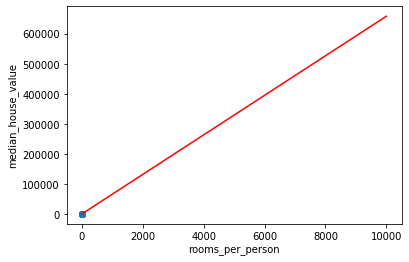

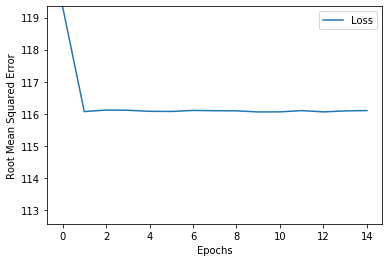

These are the Batches:
------------------------------------
10000    2
10001    2
10002    2
10003    2
10004    2
10005    2
10006    2
10007    2
10008    2
10009    2
10010    2
10011    2
10012    2
10013    2
10014    2
Name: rooms_per_person, dtype: int64
-------------------------------------
feature  label   predicted
value    value   value
         in thousand$ in thousand$
_______________________________________
    2     53             198
    2     92             198
    2     69             198
    2     62             198
    2     80             198
    2    295             198
    2    500             198
    2    342             198
    2    118             198
    2    128             198
    2    187             198
    2     80             198
    2    112             198
    2     95             198
    2     69             198


In [16]:
#Hyperparameneter using a synthetic feature
training_df["rooms_per_person"] = 2 #synthetic features are created in the program depending upon the requirement .

my_feature = "rooms_per_person"

learning_rate = 0.3
epochs = 15
batch_size = 4

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,my_feature, my_label,
                                        epochs, batch_size)
#plot the model
plot_the_model(weight, bias, my_feature, my_label)
#plot the loss
plot_the_loss_curve(epochs, rmse)
#predict the house values
predict_house_values(15, my_feature, my_label)

In [17]:
print(training_df['rooms_per_person'])
print(training_df['rooms_per_person'] [10000:10000])

0        2
1        2
2        2
3        2
4        2
        ..
16995    2
16996    2
16997    2
16998    2
16999    2
Name: rooms_per_person, Length: 17000, dtype: int64
Series([], Name: rooms_per_person, dtype: int64)


In [18]:
#This is how we can Craete a Correlation Matrix:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,NaN
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,NaN
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,NaN
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,NaN
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,NaN
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,NaN
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,NaN
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,NaN
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,NaN
rooms_per_person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
